Instructions for updating:
non-resource variables are not supported in the long term


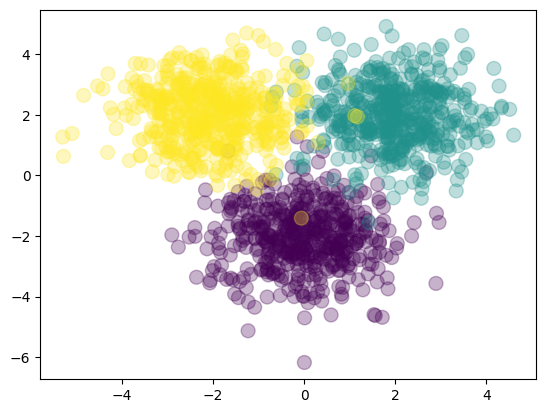

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Nclass = 500
D = 2
M = 3
K = 3

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.3)
plt.show();

In [2]:
N = len(Y)
T = np.zeros((N, K))
# indicator matrix for training
for i in range(N):
    T[i, Y[i]] = 1

In [3]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M])
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

logits = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=tfY,
        logits=logits
    )
)

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

predict_op = tf.argmax(logits, 1)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX: X})
    if i % 100 == 0:
        print("Accuracy:", np.mean(Y == pred))

AttributeError: module 'tensorflow' has no attribute 'placeholder'